In [21]:
import os
import warnings
import sys

In [22]:
import mlflow
import mlflow.sklearn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [23]:
import logging
logging.basicConfig(level=logging.WARN)
logger=logging.getLogger(__name__)

In [2]:
df = pd.read_csv('pointure.data')
df

,Genre,Taille(cm),Poids(kg),Pointure(cm)
0,masculin,182,81.6,30
1,masculin,180,86.2,28
2,masculin,170,77.1,30
3,masculin,180,74.8,25
4,féminin,152,45.4,15
5,féminin,168,68.0,20
6,féminin,165,59.0,18
7,féminin,175,68.0,23


In [3]:
df.columns

Index(['Genre', 'Taille(cm)', 'Poids(kg)', 'Pointure(cm)'], dtype='object')

In [4]:
df.shape

(8, 4)

In [6]:
df.describe()

,Taille(cm),Poids(kg),Pointure(cm)
count,8.000000,8.000000,8.000000
mean,171.500000,70.012500,23.625000
std,10.028531,13.118192,5.629958
min,152.000000,45.400000,15.000000
25%,167.250000,65.750000,19.500000
50%,172.500000,71.400000,24.000000
75%,180.000000,78.225000,28.500000
max,182.000000,86.200000,30.000000


In [7]:
import numpy as np
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
input_classes = ['masculin','féminin']
label_encoder.fit(input_classes)

# transformer un ensemble de classes
encoded_labels = label_encoder.transform(df['Genre'])
print(encoded_labels)
df['Genre'] = encoded_labels

df

[1 1 1 1 0 0 0 0]


,Genre,Taille(cm),Poids(kg),Pointure(cm)
0,1,182,81.6,30
1,1,180,86.2,28
2,1,170,77.1,30
3,1,180,74.8,25
4,0,152,45.4,15
5,0,168,68.0,20
6,0,165,59.0,18
7,0,175,68.0,23


<AxesSubplot:>

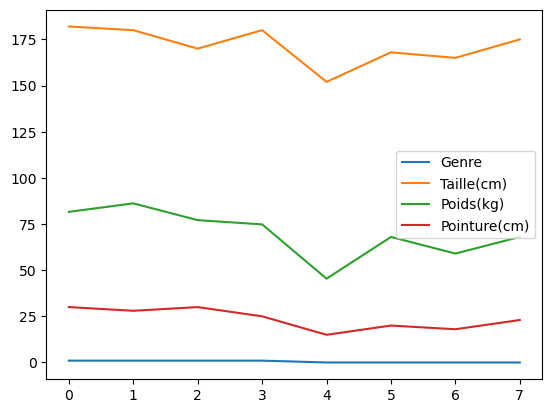

In [8]:
df.plot()

In [29]:
X = df.iloc[:, 1:4]
y = df.iloc[:, 0]

In [11]:
X

,Taille(cm),Poids(kg),Pointure(cm)
0,182,81.6,30
1,180,86.2,28
2,170,77.1,30
3,180,74.8,25
4,152,45.4,15
5,168,68.0,20
6,165,59.0,18
7,175,68.0,23


In [30]:
X

,Taille(cm),Poids(kg),Pointure(cm)
0,182,81.6,30
1,180,86.2,28
2,170,77.1,30
3,180,74.8,25
4,152,45.4,15
5,168,68.0,20
6,165,59.0,18
7,175,68.0,23


In [12]:
y

0    1
1    1
2    1
3    1
4    0
5    0
6    0
7    0
Name: Genre, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

#decomposer les donnees predicteurs en training/testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

In [14]:
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6, 3) (2, 3) (6,) (2,)


In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [16]:
y_naive_bayes1 = gnb.predict(X_train)
print("Number of mislabeled points out of a total 0%d points : 0%d" % (X_train.shape[0],(y_train != y_naive_bayes1).sum()))

Number of mislabeled points out of a total 06 points : 00


In [17]:

accuracy = metrics.accuracy_score(y_train, y_naive_bayes1)
print("Accuracy du modele Naive Bayes predit: " + str(accuracy))


recall_score = metrics.recall_score(y_train, y_naive_bayes1)
print("recall score du modele Naive Bayes predit: " + str(recall_score))

f1_score = metrics.f1_score(y_train, y_naive_bayes1)
print("F1 score du modele Naive Bayes predit: " + str(f1_score))

Accuracy du modele Naive Bayes predit: 1.0
recall score du modele Naive Bayes predit: 1.0
F1 score du modele Naive Bayes predit: 1.0


In [18]:
y_naive_bayes2 = gnb.predict(X_test)
print("Number of mislabeled points out of a total 0%d points : 0%d" % (X_test.shape[0],(y_test != y_naive_bayes2).sum()))

recall_score = metrics.recall_score(y_test, y_naive_bayes2)
print("recall score du modele Naive Bayes predit: " + str(recall_score))

f1_score = metrics.f1_score(y_test, y_naive_bayes2)
print("F1 score du modele Naive Bayes predit: " + str(f1_score))

Number of mislabeled points out of a total 02 points : 01
recall score du modele Naive Bayes predit: 0.0
F1 score du modele Naive Bayes predit: 0.0


In [19]:
d = {'Taille(cm)':[183], 'Poids(kg)':[59], 'Pointure(cm)':[20]}
dfToPredict = pd.DataFrame(data=d) 
dfToPredict

,Taille(cm),Poids(kg),Pointure(cm)
0,183,59,20


In [20]:
yPredict = gnb.predict(dfToPredict)
print('La classe predite est : ', yPredict)

La classe predite est :  [0]
